In [1]:
%config Completer.use_jedi = False

## Import Modules

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset - CIFAR 10

In [3]:
(train_X, train_y), (testData, testLabels) = cifar10.load_data()

In [4]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(train_X.shape)
print(train_y.shape)
print(testData.shape)
print(testLabels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
trainData, valData, trainLabels, valLabels = train_test_split(train_X, train_y, test_size=0.10, random_state=42)

In [7]:
print(trainData.shape)
print(trainLabels.shape)
print(valData.shape)
print(valLabels.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((trainData, trainLabels))
test_ds = tf.data.Dataset.from_tensor_slices((testData, testLabels))
val_ds = tf.data.Dataset.from_tensor_slices((valData, valLabels))

In [9]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [10]:
train_ds

<TensorSliceDataset shapes: ((32, 32, 3), (1,)), types: (tf.uint8, tf.uint8)>

Train images array shape: (4, 32, 32, 3)


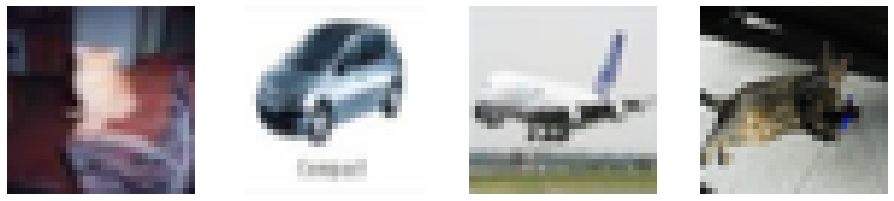

In [11]:
plt.figure(figsize=(20,20))
images = trainData[0:4]

print ("Train images array shape: {}".format(images.shape))

for i, test_image in enumerate(images, start=1):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(test_image, cmap=plt.get_cmap('gray'))

plt.show()

In [12]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
val_ds_size = tf.data.experimental.cardinality(val_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", val_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [13]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (128,128))
    return image, label

In [14]:
train_ds = (train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
val_ds = (val_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))

## Create AlexNet Model

In [15]:
input_shape = (128,128,3)
print(input_shape)

(128, 128, 3)


In [16]:
alexNet_model = Sequential()
alexNet_model.add(Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling2D(pool_size=3, strides=2))
alexNet_model.add(Conv2D(filters=256, kernel_size=5, strides=1, activation='relu', padding='same'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling2D(pool_size=3, strides=2))
alexNet_model.add(Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling2D(pool_size=(3,3), strides=2))
alexNet_model.add(Flatten())
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dense(10, activation='softmax'))

In [17]:
alexNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [18]:
alexNet_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [19]:
EPOCHS = 50

In [ ]:
history = alexNet_model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/50
1406/1406 [==============================] - 56s 33ms/step - loss: 1.5782 - accuracy: 0.4555 - val_loss: 1.3852 - val_accuracy: 0.5152
Epoch 2/50
 940/1406 [===================>..........] - ETA: 16s - loss: 1.1078 - accuracy: 0.6168

In [25]:
print("DONE")

DONE


In [27]:
acc = history.history['accuracy']
loss=history.history['loss']

Text(0.5, 1.0, 'Training Accuracy and Loss')

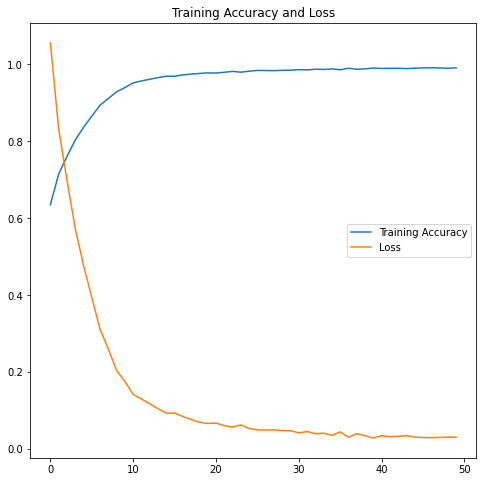

In [28]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [31]:
score = alexNet_model.evaluate(test_ds)

312/312 [==============================] - 37s 89ms/step - loss: 1.1787 - accuracy: 0.81261s - loss: 1.1856 - accuracy: 0.81 - ETA: 1s - loss: 1.1854 - accuracy: 0.81 - ETA: 1s - l


In [34]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1] ))

Test loss: 1.1787457466125488
Test accuracy: 0.8126001358032227
